In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("PIMAIndianDiabetes.csv")
data.head()

,DiabetesPedigreeFunction,Insulin,BloodPressure,Glucose,Outcome,Pregnancies,BMI,SkinThickness,Age
0,0.627,0,72,148,1,6,33.6,35,50
1,0.351,0,66,85,0,1,26.6,29,31
2,0.672,0,64,183,1,8,23.3,0,32
3,0.167,94,66,89,0,1,28.1,23,21
4,2.288,168,40,137,1,0,43.1,35,33


In [7]:
X = data[data.columns[1:]]
y = data['DiabetesPedigreeFunction']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [27]:
clf = DecisionTreeRegressor(random_state=2019,max_depth=3)
clf2 = clf.fit(X_train, y_train)


In [28]:
import graphviz 
from sklearn import tree

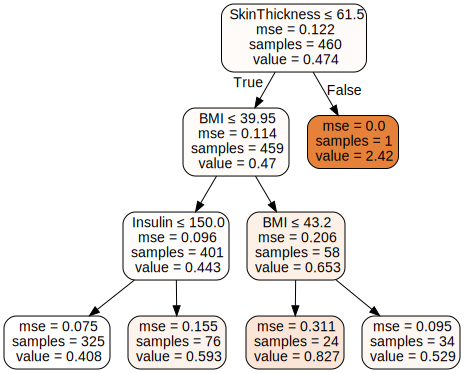

In [29]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=list(X_train),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [12]:
y_pred = clf2.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [13]:
print(mean_squared_error(y_test, y_pred) ** 0.5)

0.3195810512379378


In [14]:
print(mean_absolute_error(y_test, y_pred))

0.2419516811465109


In [15]:
print(r2_score(y_test, y_pred))

-0.1268070674117514


In [35]:

depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=42)
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=2018)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,y)

/Users/sujit.deokar/Documents/python_env/Rubiscape_stage/lib/python3.5/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=2018,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_sam

In [36]:
print(cv.best_params_)

print(cv.best_score_)

cv.best_estimator_

{'min_samples_leaf': 15, 'max_depth': 3, 'min_samples_split': 5}
-0.01635233712275246


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2018, splitter='best')

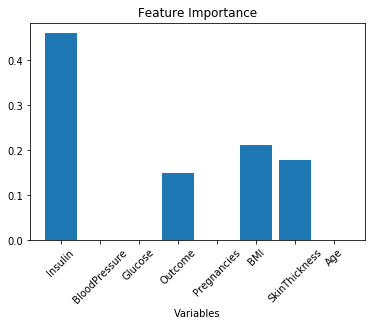

In [37]:
best_model = cv.best_estimator_
import matplotlib.pyplot as plt

best_model.feature_importances_

ind = np.arange(8)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns),rotation=45)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()